### TITANIC
* à partir de l'url suivante: 
  [http://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv](http://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv)

* scruter les données, les **champs utiles** ...
* calculer le **nb, la somme et le pourcentage de survivants** chez **les femmes et les enfants** par **classe**


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
rng = np.random.default_rng(seed=int(time()))
pd.__version__

URL = "http://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"

def percent(s: pd.Series):
    return np.around(s.sum()/s.count() * 100, 1)

In [27]:
titanic_df = pd.read_csv(
    URL,
    encoding="utf8"
)
titanic_df.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [28]:
# titanic_df["who"] != "man"
sub_df = titanic_df.loc[titanic_df["who"] != "man", ["survived","pclass","who"]]
sub_df

,survived,pclass,who
1,1,1,woman
2,1,3,woman
3,1,1,woman
7,0,3,child
8,1,3,woman
...,...,...,...
880,1,2,woman
882,0,3,woman
885,0,3,woman
887,1,1,woman


In [33]:
gb = sub_df.groupby(["pclass", "who"])
result_df = gb["survived"].agg(["count", "sum", percent])# .swaplevel(1,0).sort_index(axis=0, level=0)
result_df

count  sum  percent
pclass who                       
1      child      6    5     83.3
       woman     91   89     97.8
2      child     19   19    100.0
       woman     66   60     90.9
3      child     58   25     43.1
       woman    114   56     49.1

<Axes: ylabel='percent'>

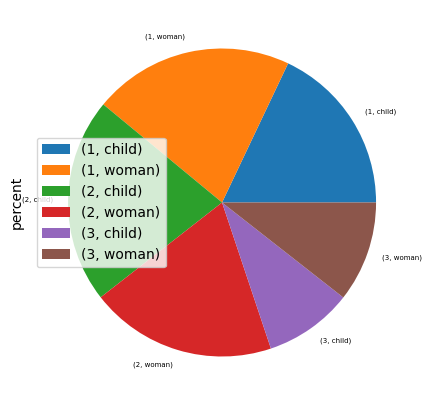

In [38]:
result_df.plot(y="percent", kind="pie", figsize=(5,5), fontsize=5)